In [3]:
import cv2
import numpy as np
from collections import deque
from google.colab.patches import cv2_imshow

Synthetic Image (for region growing):


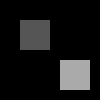

In [4]:
# Synthetic image creation (same as Q1)
synthetic_img = np.zeros((100, 100), dtype=np.uint8)
synthetic_img[20:50, 20:50] = 85    # Object 1
synthetic_img[60:90, 60:90] = 170   # Object 2

# Display the synthetic image
print("Synthetic Image (for region growing):")
cv2_imshow(synthetic_img)

In [5]:
def region_growing(image, seed_point, threshold):
  height, width = image.shape
  seed_value = int(image[seed_point[1], seed_point[0]])
  visited = np.zeros_like(image, dtype=bool)
  segmented = np.zeros_like(image, dtype=np.uint8)

  # Use a queue for iterative BFS
  queue = deque()
  queue.append(seed_point)

  while queue:
    x, y = queue.popleft()

    if visited[y, x]:
      continue

    current_value = int(image[y, x])
    if abs(current_value - seed_value) <= threshold:
      segmented[y, x] = 255
      visited[y, x] = True

      # Explore 4-connected neighbors
      for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < width and 0 <= ny < height:
          if not visited[ny, nx]:
            queue.append((nx, ny))

  return segmented

Segmented Region from Seed (25, 25) with Threshold ±10:


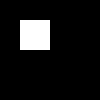

In [12]:
# Define seed and threshold
seed_point = (25, 25)  # (x, y) format
threshold = 10

# Apply region growing
segmented_img = region_growing(synthetic_img, seed_point, threshold)

# Display the result
print(f"Segmented Region from Seed {seed_point} with Threshold ±{threshold}:")
cv2_imshow(segmented_img)